# Fish Weight Estimation using Multilinear Regression

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

C:\Users\MRINALINI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing dataset and creating dataframe 

In [2]:
data=pd.read_csv("Fish.csv")
df=pd.DataFrame(data)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Statistical Visualization

In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.isnull().values.any()

False

In [7]:
specnts = df["Species"].value_counts()
specnts = pd.DataFrame(specnts)
specnts.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


# Visualization using Graph

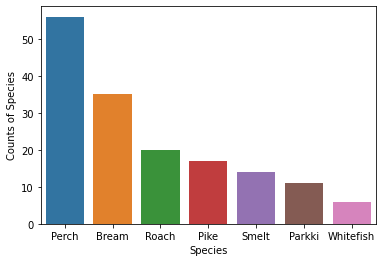

In [8]:
sns.barplot(x=specnts.index, y=specnts['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

In [9]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

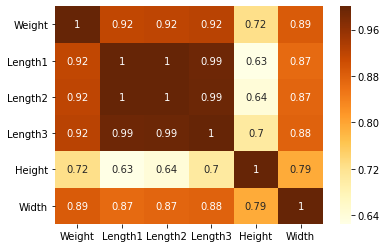

In [10]:
sns.heatmap(df.corr(),cmap='YlOrBr',annot=True)

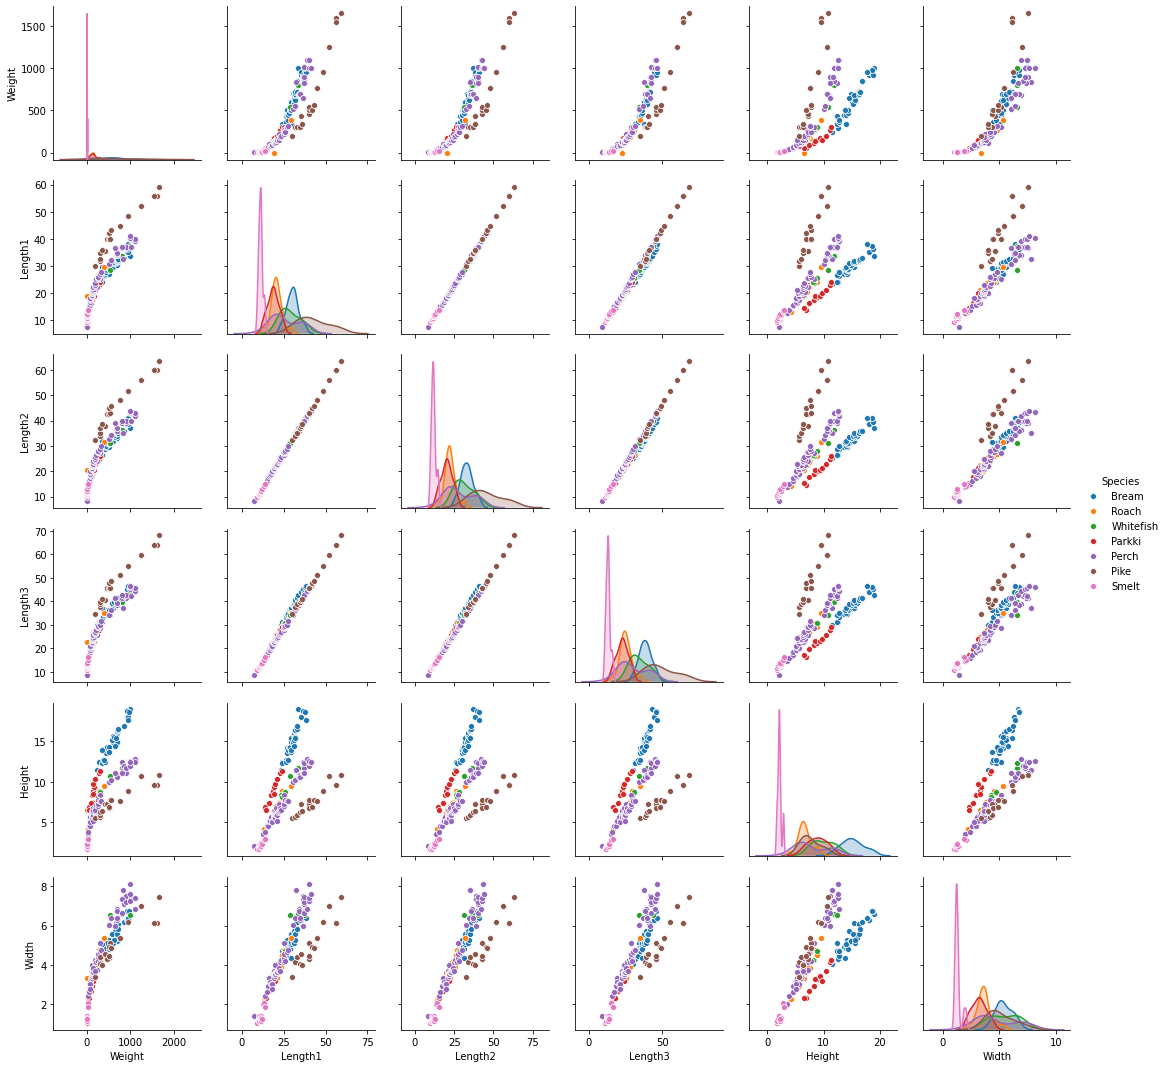

In [11]:
sns.pairplot(df, kind='scatter',hue='Species')

# Visualize outliers and removal of outliers

<AxesSubplot:xlabel='Weight'>

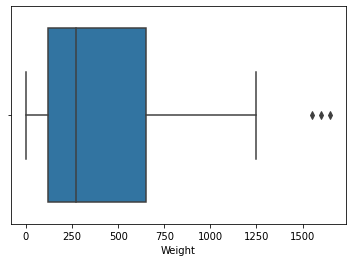

In [12]:
sns.boxplot(df["Weight"])

In [13]:
dfw=df["Weight"]
dfw_Q1=dfw.quantile(0.25)
dfw_Q3=dfw.quantile(0.75)
dfw_IQR=dfw_Q3-dfw_Q1
dfw_lower=dfw_Q1-(1.5*dfw_IQR)
dfw_upper=dfw_Q3+(1.5*dfw_IQR)
dfw_outliers=dfw[(dfw<dfw_lower) | (dfw>dfw_upper)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

<AxesSubplot:xlabel='Length1'>

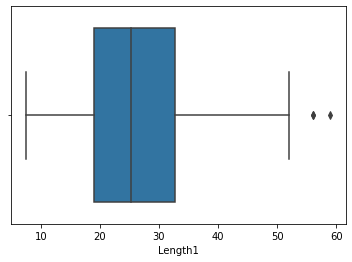

In [14]:
sns.boxplot(df["Length1"])

In [15]:
dfl1=df["Length1"]
dfl1_Q1=dfl1.quantile(0.25)
dfl1_Q3=dfl1.quantile(0.75)
dfl1_IQR=dfl1_Q3-dfl1_Q1
dfl1_lower=dfl1_Q1-(1.5*dfl1_IQR)
dfl1_upper=dfl1_Q3+(1.5*dfl1_IQR)
dfl1_outliers=dfl1[(dfl1<dfl1_lower) | (dfl1>dfl1_upper)]
dfl1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

<AxesSubplot:xlabel='Length2'>

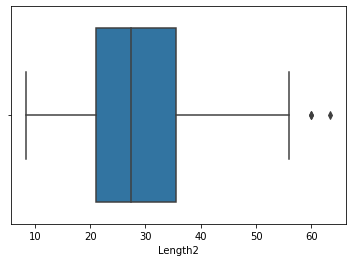

In [16]:
sns.boxplot(df["Length2"])

In [17]:
dfl2=df["Length2"]
dfl2_Q1=dfl2.quantile(0.25)
dfl2_Q3=dfl2.quantile(0.75)
dfl2_IQR=dfl2_Q3-dfl2_Q1
dfl2_lower=dfl2_Q1-(1.5*dfl2_IQR)
dfl2_upper=dfl2_Q3+(1.5*dfl2_IQR)
dfl2_outliers=dfl2[(dfl2<dfl2_lower) | (dfl2>dfl2_upper)]
dfl2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

<AxesSubplot:xlabel='Length3'>

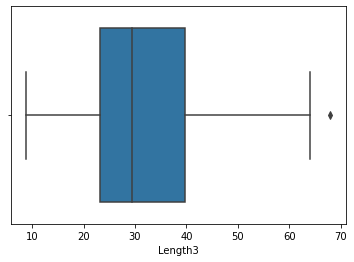

In [18]:
sns.boxplot(df["Length3"])

In [19]:
dfl3=df["Length3"]
dfl3_Q1=dfl3.quantile(0.25)
dfl3_Q3=dfl3.quantile(0.75)
dfl3_IQR=dfl3_Q3-dfl3_Q1
dfl3_lower=dfl3_Q1-(1.5*dfl3_IQR)
dfl3_upper=dfl3_Q3+(1.5*dfl3_IQR)
dfl3_outliers=dfl2[(dfl3<dfl3_lower) | (dfl3>dfl3_upper)]
dfl3_outliers

144    63.4
Name: Length2, dtype: float64

<AxesSubplot:xlabel='Height'>

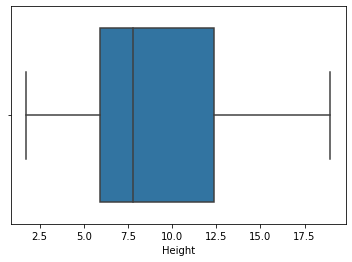

In [20]:
sns.boxplot(df["Height"])

<AxesSubplot:xlabel='Width'>

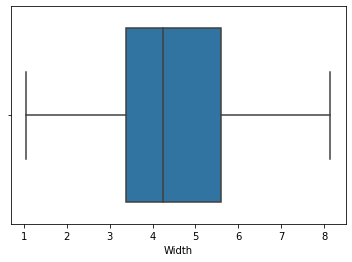

In [21]:
sns.boxplot(df["Width"])

In [22]:
df[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [23]:
dfn=df.drop([142,143,144])
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Length1,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
Length2,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
Length3,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


In [24]:
dfn

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Building machine learning model

In [25]:
#Splitting of data
from sklearn.model_selection import train_test_split
x=dfn.iloc[:,2:7]
y=dfn['Weight']
print(x.shape)
print(y.shape)

(156, 5)
(156,)


In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=1)
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [27]:
print('X_train: ', np.shape(xtrain))
print('X_test: ', np.shape(xtest))
print('Y_train: ', np.shape(ytrain))
print('Y_test: ', np.shape(ytest))

X_train:  (140, 5)
X_test:  (16, 5)
Y_train:  (140,)
Y_test:  (16,)


In [28]:
print('Model intercept: ', lr.intercept_)
print('Model coefficients: ', lr.coef_)

Model intercept:  -433.9574117898727
Model coefficients:  [102.81453905 -43.95386472 -38.88312953  35.79930462  59.83114284]


In [29]:
ypred=lr.predict(xtrain)
ypred

array([ 864.74219667,  600.12668759,  636.90254704,  801.32778794,
        285.61213541, -178.37154892, -203.54093563,  252.44507274,
        185.88655171,  321.15700647,  165.33874147,  132.08347884,
        765.0801274 ,  211.65350296,  378.99829718,  662.47033747,
        210.33308562,  895.29528147,  930.13602051,  705.54873134,
        947.35201003,  422.59041321, -144.11041931,  921.38349778,
        588.90042918,  713.97544207,  873.11673983,  796.49148236,
        504.77661947,  589.86893026,  -76.61125686,  356.88853772,
        552.51982623,   79.60588152,  636.48022739,  214.63925074,
        446.5990264 ,  181.3992497 ,  446.41079057,  172.48719298,
         31.69560672,  811.69878974, -151.16451105,  669.8122701 ,
        511.9652453 ,  549.22991063,  167.5965397 ,  936.92958507,
        238.6245795 ,  841.83219878,  373.35699088,  448.78173746,
        498.00941137,  321.34702803,  773.28209555,  223.13875429,
        287.87066452,   89.42817856,  144.83551468,  197.53170

In [30]:
r2_score(ytrain,ypred)

0.9063722819664433

In [31]:
ypred_test=lr.predict(xtest)
ypred_test

array([ 752.65986349,   49.27459973,  287.3848012 ,  785.32213974,
        -73.1421408 ,  164.26696589,  580.5459414 ,  657.30370559,
        352.16633905, -157.28248789, -154.94928143,   90.06119736,
        211.56051261,  178.32187698,  162.82049472,  448.56629251])

In [32]:
r2_score(ytest,ypred_test)

0.8511723215905416

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score_train=cross_val_score(lr,xtrain,ytrain,cv=10,scoring='r2')
cross_val_score_train

array([0.87823011, 0.83941903, 0.90278446, 0.90697901, 0.96785462,
       0.89510744, 0.94928508, 0.8541845 , 0.86106159, 0.81687206])

In [34]:
cross_val_score_train.mean()

0.8871777912462138

# Graph for visualizing linear reg model

Text(0.5, 1.0, 'Linear reg model for weight estimation')

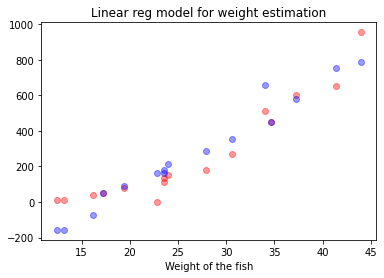

In [35]:
plt.scatter(xtest["Length3"],ytest,color='red',alpha=0.4)
plt.scatter(xtest["Length3"],ypred_test,color='blue',alpha=0.4)
plt.xlabel('Cross length in cm')
plt.xlabel('Weight of the fish')
plt.title('Linear reg model for weight estimation')

Text(0.5, 1.0, 'Linear reg model for weight estimation')

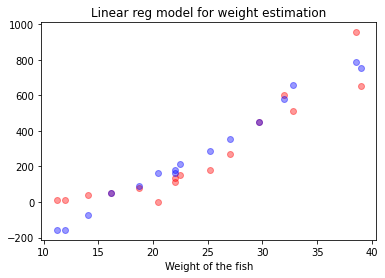

In [36]:
plt.scatter(xtest["Length2"],ytest,color='red',alpha=0.4)
plt.scatter(xtest["Length2"],ypred_test,color='blue',alpha=0.4)
plt.xlabel('VErtical length in cm')
plt.xlabel('Weight of the fish')
plt.title('Linear reg model for weight estimation')

Text(0.5, 1.0, 'Linear reg model for weight estimation')

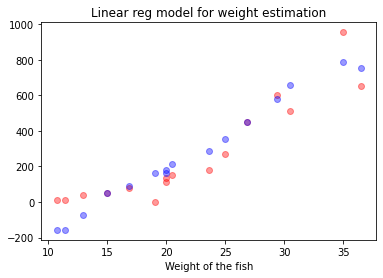

In [37]:
plt.scatter(xtest["Length1"],ytest,color='red',alpha=0.4)
plt.scatter(xtest["Length1"],ypred_test,color='blue',alpha=0.4)
plt.xlabel('Diagonal length in cm')
plt.xlabel('Weight of the fish')
plt.title('Linear reg model for weight estimation')

Text(0.5, 1.0, 'Linear reg model for weight estimation')

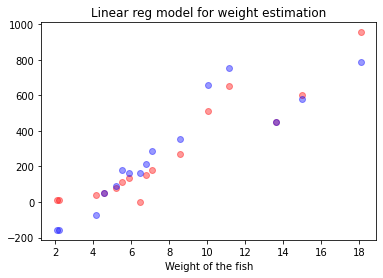

In [38]:
plt.scatter(xtest["Height"],ytest,color='red',alpha=0.4)
plt.scatter(xtest["Height"],ypred_test,color='blue',alpha=0.4)
plt.xlabel('Height in cm')
plt.xlabel('Weight of the fish')
plt.title('Linear reg model for weight estimation')

Text(0.5, 1.0, 'Linear reg model for weight estimation')

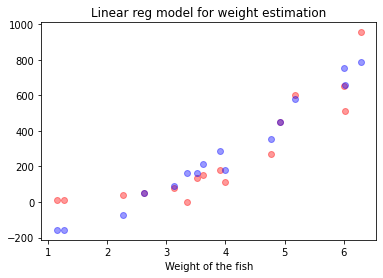

In [39]:
plt.scatter(xtest["Width"],ytest,color='red',alpha=0.4)
plt.scatter(xtest["Width"],ypred_test,color='blue',alpha=0.4)
plt.xlabel('Width length in cm')
plt.xlabel('Weight of the fish')
plt.title('Linear reg model for weight estimation')

# Comparison of actual vs predicted

In [40]:
compare1=pd.DataFrame(ypred_test,columns=['Estimated Weight'])
compare2=pd.DataFrame(ytest,columns=['Weight'])
compare2=compare2.reset_index(drop=True)

In [41]:
comparison=pd.concat([compare1,compare2],axis=1)
comparison

,Estimated Weight,Weight
0,752.659863,650.0
1,49.274600,51.5
2,287.384801,180.0
3,785.322140,955.0
4,-73.142141,40.0
5,164.266966,0.0
6,580.545941,600.0
7,657.303706,514.0
8,352.166339,272.0
9,-157.282488,9.8
